# 产品营销模型

In [90]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #过滤掉警告的意思

In [2]:
data=pd.read_csv("F:/data/training30.csv")

### 1.缺失值处理

In [3]:
data.isna().sum() #检查是否存在缺失值，并对每列的缺失值个数求和

ID                                     0
Product using score                 2376
Userarea                            2420
gender                              2433
age                                 2385
Cumulative using time               2362
Point balance                       2359
Product service usage               2402
Pay a monthly fee by credit card    2510
Active user                         2403
Estimated salary                    2440
Purchase or not                        0
dtype: int64

In [4]:
data=data.dropna(axis=0, how='any') #删除存在缺失值的行，使用参数axis = 0;删除列的参数axis = 1

In [5]:
data.shape

(240, 12)

### 2.数据编码

In [6]:
from sklearn.preprocessing import LabelEncoder  #使用sklearn中用于编码的类

In [7]:
#使用scikit-learn库进行整数编码
le = LabelEncoder() #用LabelEncoder把字符串都转化为整型
a = le.fit_transform(data['gender'].values) #对gender进行编码
#a #1表示“Male”0表示“Female”

In [8]:
data['gender'] = a #将编码后的列写入数据

In [9]:
data['Userarea'].value_counts() #计算"Userarea"这一变量中各个类别的个数

Taipei      143
Taichung     49
Tainan       48
Name: Userarea, dtype: int64

In [10]:
b=pd.get_dummies(data['Userarea']) #get_dummies默认会对DataFrame中所有字符串类型的列进行独热编码
b.head()

,Taichung,Tainan,Taipei
5,0,0,1
16,0,0,1
36,1,0,0
70,0,1,0
89,1,0,0


In [11]:
type(b) #查看b的数据格式

pandas.core.frame.DataFrame

In [12]:
data=pd.concat([data, b], axis=1) #concat为合并数据框的函数，axis=1表示横向拼接；axis=0表示纵向拼接
data.head()

,ID,Product using score,Userarea,gender,age,Cumulative using time,Point balance,Product service usage,Pay a monthly fee by credit card,Active user,Estimated salary,Purchase or not,Taichung,Tainan,Taipei
5,7,822.0,Taipei,1,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0,0,0,1
16,21,732.0,Taipei,1,41.0,8.0,0.00,2.0,1.0,1.0,170886.17,0,0,0,1
36,47,829.0,Taichung,0,27.0,9.0,112045.67,1.0,1.0,1.0,119708.21,1,1,0,0
70,95,730.0,Tainan,1,42.0,4.0,0.00,2.0,0.0,1.0,85982.47,0,0,1,0
89,119,524.0,Taichung,0,31.0,8.0,107818.63,1.0,1.0,0.0,199725.39,1,1,0,0


In [13]:
data.drop(['Userarea','Taipei','ID'], axis=1, inplace=True) 
#删除'Userarea','Taipei','ID'这几列，axis=1表示删除列； axis=0表示删除行

### 3.最大最小归一化

In [14]:
#标准化
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()  
data_minMax = min_max_scaler.fit_transform(data)  

In [15]:
data = pd.DataFrame(data_minMax) #数值转化为数据框

In [16]:
data.shape

(240, 12)

In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.944,1.0,0.500000,0.7,0.000000,0.333333,1.0,1.0,0.047736,0.0,0.0,0.0
1,0.764,1.0,0.354839,0.8,0.000000,0.333333,1.0,1.0,0.855203,0.0,0.0,0.0
2,0.958,0.0,0.129032,0.9,0.525675,0.000000,1.0,1.0,0.598247,1.0,1.0,0.0
3,0.760,1.0,0.370968,0.4,0.000000,0.333333,0.0,1.0,0.428916,0.0,0.0,1.0
4,0.348,0.0,0.193548,0.8,0.505844,0.000000,1.0,0.0,1.000000,1.0,1.0,0.0


In [19]:
#为dataframe加上列名
data.columns = ["Product using score","gender","age","Cumulative using time","Point balance","Product service usage","Pay a monthly fee by credit card","Active user","Estimated salary","Purchase or not","Taichung","Tainan"]


In [20]:
data.head()

,Product using score,gender,age,Cumulative using time,Point balance,Product service usage,Pay a monthly fee by credit card,Active user,Estimated salary,Purchase or not,Taichung,Tainan
0,0.944,1.0,0.500000,0.7,0.000000,0.333333,1.0,1.0,0.047736,0.0,0.0,0.0
1,0.764,1.0,0.354839,0.8,0.000000,0.333333,1.0,1.0,0.855203,0.0,0.0,0.0
2,0.958,0.0,0.129032,0.9,0.525675,0.000000,1.0,1.0,0.598247,1.0,1.0,0.0
3,0.760,1.0,0.370968,0.4,0.000000,0.333333,0.0,1.0,0.428916,0.0,0.0,1.0
4,0.348,0.0,0.193548,0.8,0.505844,0.000000,1.0,0.0,1.000000,1.0,1.0,0.0


### 4.样本筛选

In [21]:
data['Purchase or not'].value_counts()

0.0    190
1.0     50
Name: Purchase or not, dtype: int64

数据不平衡

In [22]:
#划分自变量与目标变量
X = data.drop("Purchase or not",axis=1)
Y = data["Purchase or not"] #将'Purchase or not'作为目标变量，注意变量上面的引号不用忘记

In [23]:
#将X,Y按顺序排列，方便查看
data=pd.concat([X, Y], axis=1) #concat为合并数据框的函数，axis=1表示横向拼接；axis=0表示纵向拼接
data.head()

,Product using score,gender,age,Cumulative using time,Point balance,Product service usage,Pay a monthly fee by credit card,Active user,Estimated salary,Taichung,Tainan,Purchase or not
0,0.944,1.0,0.500000,0.7,0.000000,0.333333,1.0,1.0,0.047736,0.0,0.0,0.0
1,0.764,1.0,0.354839,0.8,0.000000,0.333333,1.0,1.0,0.855203,0.0,0.0,0.0
2,0.958,0.0,0.129032,0.9,0.525675,0.000000,1.0,1.0,0.598247,1.0,0.0,1.0
3,0.760,1.0,0.370968,0.4,0.000000,0.333333,0.0,1.0,0.428916,0.0,1.0,0.0
4,0.348,0.0,0.193548,0.8,0.505844,0.000000,1.0,0.0,1.000000,1.0,0.0,1.0


In [24]:
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter

In [25]:
#使用上采样(过采样)的方法处理数据不均衡
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X = X.astype('float64')
X_smo, Y_smo = smo.fit_sample(X, Y)

In [26]:
print(Counter(Y_smo)) #查看经过SMOTE之后的数据分布

Counter({0.0: 190, 1.0: 190})


In [27]:
X=X_smo
Y=Y_smo #变量值传递

### 5.特征选择

#### 5.1通过随机森林选择特征

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [29]:
#基于随机森林度量各个变量的重要性
clf = RandomForestClassifier()
clf = clf.fit(X, Y)
c=clf.feature_importances_
c

array([0.11101165, 0.02716571, 0.2608482 , 0.07936364, 0.09327909,
       0.19466668, 0.0244915 , 0.0702451 , 0.0957905 , 0.02872374,
       0.01441419])

In [30]:
import matplotlib.pyplot as plt

In [31]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(c)[::-1]

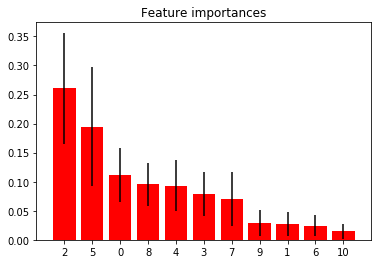

In [32]:
#对变量重要性画图，并依次降序排列
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), c[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [33]:
#删除重要程度小于0.05的变量
X.drop(['gender','Pay a monthly fee by credit card','Taichung','Tainan'], axis=1, inplace=True) 
#删除第2,7,10,11个变量

In [34]:
X.head()

,Product using score,age,Cumulative using time,Point balance,Product service usage,Active user,Estimated salary
0,0.944,0.500000,0.7,0.000000,0.333333,1.0,0.047736
1,0.764,0.354839,0.8,0.000000,0.333333,1.0,0.855203
2,0.958,0.129032,0.9,0.525675,0.000000,1.0,0.598247
3,0.760,0.370968,0.4,0.000000,0.333333,1.0,0.428916
4,0.348,0.193548,0.8,0.505844,0.000000,0.0,1.000000


#### 5.2通过交叉验证消除递归特征

In [35]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [36]:
#创建RFE对象并计算交叉验证的分数。
svc = SVC(kernel="linear")

In [37]:
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, Y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [38]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


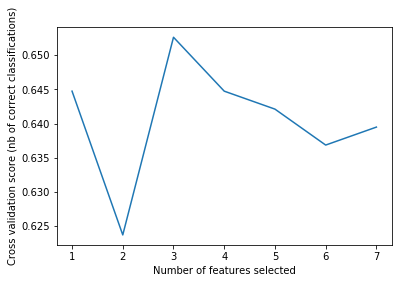

In [39]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

由图可以看出，当保留三个特征时得分最高

### 6.PCA降维

### 7.交叉验证

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) ##数据集的划分

In [42]:
X_train.shape,Y_train.shape #查看X、Y训练集的类型

((304, 7), (304,))

### 8.建模

#### 8.1 Logistic

In [303]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [290]:
#基于训练集使用逻辑回归建模
classifier = LogisticRegression(random_state=0)#实例化算法
model1=classifier.fit(X_train, Y_train)#模型训练
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 8.2 随机森林

In [300]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
classifier = RandomForestClassifier(n_estimators=1000)
model2=classifier.fit(X_train, Y_train)#模型训练
model2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

预测得分为0.6375

#### 8.4Adaboost

In [387]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [389]:
classifier = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()

0.906

In [390]:
model4=classifier.fit(X_train, Y_train)#模型训练
model4

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

#### 8.5梯度树增强

In [366]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [367]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
classifier.score(X_test,Y_test)

0.8026315789473685

In [368]:
model5=classifier.fit(X_train, Y_train)#模型训练
model5

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### 8.6多层感知器MLP

In [567]:
from sklearn.neural_network import MLPClassifier

In [568]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [570]:
model6=classifier.fit(X_train, Y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### 8.7 XGboost

In [655]:
import xgboost as xgb

In [681]:
data.drop(['gender','Pay a monthly fee by credit card','Taichung','Tainan'], axis=1, inplace=True) 

In [682]:
data = pd.DataFrame(data)
label = pd.DataFrame(np.random.randint(2, size=240))
dtrain = xgb.DMatrix(data, label=label)

In [683]:
dtest

In [684]:
dtest = xgb.DMatrix(test, label=label)

In [685]:
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)

In [686]:
preds = bst.predict(dtest)

In [688]:
preds.shape

(2000,)

In [689]:
preds

array([0.4539436 , 0.4887098 , 0.4539436 , ..., 0.58316964, 0.37581968,
       0.75999284], dtype=float32)

In [690]:
result = pd.DataFrame(preds)
result.head()

,0
0,0.453944
1,0.488710
2,0.453944
3,0.453944
4,0.453944


In [691]:
result.to_csv("F:/data/results.csv",index=False)#转换成csv文件

#### 8.8高斯贝叶斯

In [38]:
from sklearn.naive_bayes import GaussianNB##导入算法

In [39]:
model8 = GaussianNB()#实例化算法

In [41]:
model8.fit(X_train,Y_train)#模型训练

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
model8.score(X_test,Y_test)#模型评分

0.8026315789473685

#### 8.9KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier#knn分类算法
from sklearn.metrics import accuracy_score,f1_score#精度函数,评分函数

In [46]:
KNN = KNeighborsClassifier()#模型实例化算法

In [48]:
model9 = KNN.fit(X_train,Y_train)#训练集训练

In [49]:
model9.predict(X_test)#预测

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0.])

In [50]:
accuracy_score(model9.predict(X_test),Y_test)#评分

0.8421052631578947

In [52]:
f1_score(Y_test,model9.predict(X_test),average="micro")

0.8421052631578947

#### 8.10决策树

In [43]:
from sklearn.tree import DecisionTreeClassifier#导入决策树算法
from sklearn import tree#导入一棵树

In [44]:
model10=model10 = DecisionTreeClassifier(max_depth=4,criterion="entropy")#实例化

In [45]:
model10.fit(X_train,Y_train)#模型的训练

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
#预测样本类别
model10.predict(X_test)

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0.])

In [47]:
#预测每个类别的概率，这是叶子中相同类别的训练样本的分数
result=model10.predict_proba(X_test)
result = pd.DataFrame(result)
result.head()

,0,1
0,1.000000,0.000000
1,0.500000,0.500000
2,0.016949,0.983051
3,0.016949,0.983051
4,0.916667,0.083333


In [48]:
data.drop(['gender','Pay a monthly fee by credit card','Taichung','Tainan'], axis=1, inplace=True) 

In [49]:
data.head()

,Product using score,age,Cumulative using time,Point balance,Product service usage,Active user,Estimated salary,Purchase or not
0,0.944,0.500000,0.7,0.000000,0.333333,1.0,0.047736,0.0
1,0.764,0.354839,0.8,0.000000,0.333333,1.0,0.855203,0.0
2,0.958,0.129032,0.9,0.525675,0.000000,1.0,0.598247,1.0
3,0.760,0.370968,0.4,0.000000,0.333333,1.0,0.428916,0.0
4,0.348,0.193548,0.8,0.505844,0.000000,0.0,1.000000,1.0


In [50]:
import graphviz
from sklearn.tree import export_graphviz

In [51]:
dot_data = tree.export_graphviz(model10, out_file=None,##算法，
                                max_depth=12,#最大深度
                                feature_names=data.columns[:-1],  #特征名
                                class_names=['No', 'Yes'],  #标签名
                                filled=True,#填充颜色
                                rounded=True, #光滑一点
#                                 special_characters=True
                               )

In [52]:
data=data.values #数据框转数组

In [53]:
graph = graphviz.Source(dot_data)

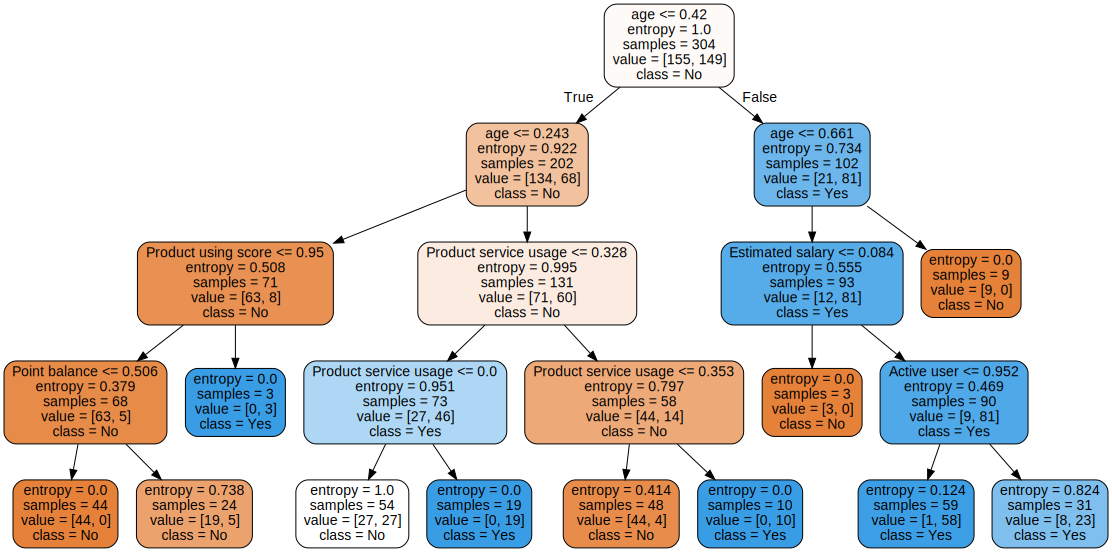

In [54]:
graph

In [55]:
#将决策树图导出为pdf
graph.render('example.gv', directory='F:\data', view=True)
print('Save example.gv file!\n')

Save example.gv file!



In [56]:
#计算训练集和测试集的得分，判断是否过拟合
print("train score:", model10.score(X_train, Y_train))
print("test score:", model10.score(X_test, Y_test))

train score: 0.8519736842105263
test score: 0.7368421052631579


In [57]:
#下面优化参数模型
#确定树的最大深度
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, Y_train)
    return(clf.score(X_train, Y_train), clf.score(X_test, Y_test))

In [58]:
depths = np.arange(1,16) #树的最大声度取1到15
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
te_scores = [s[1] for s in scores]

In [59]:
# 找出交叉验证数据集评分最高的索引
tr_best_index = np.argmax(tr_scores)
te_best_index = np.argmax(te_scores)

In [60]:
print("bestdepth:", te_best_index+1, " bestdepth_score:", te_scores[te_best_index], '\n')

bestdepth: 8  bestdepth_score: 0.868421052631579 



In [61]:
from matplotlib import pyplot as plt

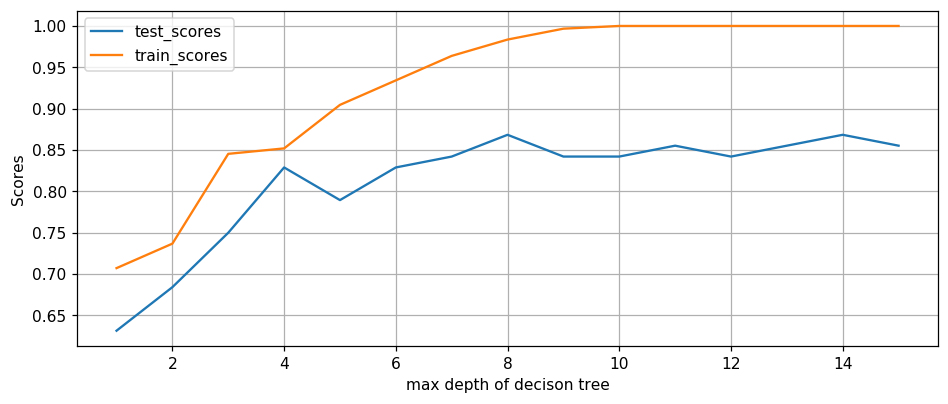

In [62]:
epths = np.arange(1,10)
plt.figure(figsize=(10,4), dpi=111)#图的大小和透明度以及缩放比例
plt.grid()#显示网格
plt.xlabel('max depth of decison tree')
plt.ylabel('Scores')
plt.plot(depths, te_scores, label='test_scores')
plt.plot(depths, tr_scores, label='train_scores')
plt.legend()#显示图例

In [63]:
#剪枝
def minsplit_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)#模型的参数
    clf.fit(X_train, Y_train)#模型的训练
    return (clf.score(X_train, Y_train), clf.score(X_test, Y_test), )#返回评分

In [64]:
# 指定参数范围，分别训练模型并计算得分
vals = np.linspace(0, 0.2, 100)#平均分成一百份
scores = [minsplit_score(v) for v in vals]
tr_scores = [s[0] for s in scores]
te_scores = [s[1] for s in scores]

In [65]:
bestmin_index = np.argmax(te_scores)##选出最大的那个评分的索引
bestscore = te_scores[bestmin_index]#值
print("bestmin:", vals[bestmin_index])
print("bestscore:", bestscore)

bestmin: 0.00202020202020202
bestscore: 0.8552631578947368


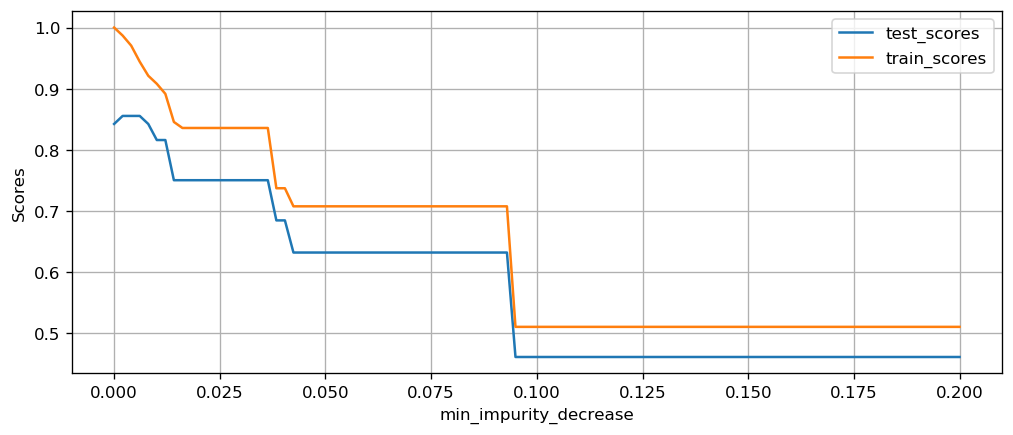

In [66]:
plt.figure(figsize=(10,4), dpi=120)
plt.grid()
plt.xlabel("min_impurity_decrease") #不纯度减少的最小值
plt.ylabel("Scores")
plt.plot(vals, te_scores, label='test_scores')
plt.plot(vals, tr_scores, label='train_scores')
plt.legend()

In [67]:
np.linspace(0, 0.2, 100).shape

(100,)

In [68]:
from sklearn import metrics #对模型进行评估的函数

In [69]:
model = DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0)
model.fit(X_train, Y_train)
print("test_score:", model.score(X_test, Y_test))

test_score: 0.8552631578947368


In [70]:
Y_pred = model.predict(X_test)
print("查准率:",metrics.precision_score(Y_test, Y_pred))#预测值和真实值作对比
print("召回率:",metrics.recall_score(Y_test, Y_pred))
print("F1_score:",metrics.f1_score(Y_test, Y_pred))

查准率: 0.8947368421052632
召回率: 0.8292682926829268
F1_score: 0.860759493670886


In [86]:
#下面开始网格搜索
from sklearn.model_selection import GridSearchCV##网格搜索

In [87]:
thresholds = np.linspace(0, 0.2, 50)
param_grid = {'min_impurity_decrease':thresholds,"max_depth":np.arange(1,10)}

In [88]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)#算法，参数，交叉验证的次数
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
       0.10204082, 0.10612245, 0.11020408, 0.11428571, 0.11836735,
       0.12244898, 0.12653061, 

In [89]:
print("best_parms:{0}\nbest_score:{1}".format(clf.best_params_, clf.best_score_))

best_parms:{'max_depth': 5, 'min_impurity_decrease': 0.00816326530612245}
best_score:0.8263157894736842


### 9.计算得分

In [463]:
from sklearn.metrics import confusion_matrix

In [464]:
# 将模型应用于测试集并查看混淆矩阵
Y_pred = classifier.predict(X_test)#预测
confusion_matrix = confusion_matrix(Y_test, Y_pred)#打印混淆矩阵，是很多评分函数的标准来源
print(confusion_matrix)#打印混淆矩阵

[[29  6]
 [10 31]]


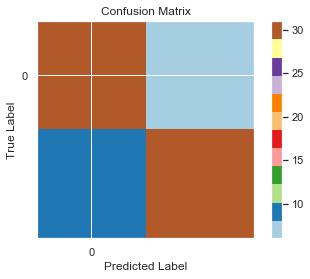

In [465]:
#混淆矩阵可视化
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(1)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
plot_confusion_matrix(confusion_matrix)

In [466]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [467]:
type(Y_test)

pandas.core.series.Series

In [468]:
type(Y_pred)

numpy.ndarray

In [469]:
Y_test = Y_test.as_matrix() #列表转数组
type(Y_test)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [470]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred) #这里需要"Y_test","Y_pred"都为数组

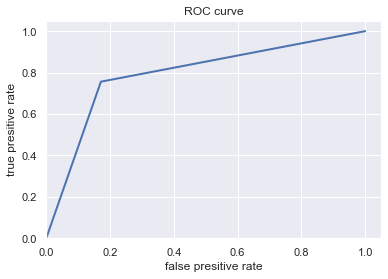

In [471]:
plt.plot(fpr,tpr,linewidth=2,label="ROC")
plt.xlabel("false presitive rate")
plt.ylabel("true presitive rate")
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.title('ROC curve')
plt.show()

In [472]:
#在测试集上的准确率
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [473]:
m=confusion_matrix
m

array([[29,  6],
       [10, 31]], dtype=int64)

In [474]:
m.shape

(2, 2)

In [475]:
m = pd.DataFrame(m)

In [476]:
m

,0,1
0,29,6
1,10,31


In [477]:
m00=m.iat[0,0]
m10=m.iat[1,0]

In [478]:
score=700*m00-500*m10
score

15300

# 开始拿测试集来做

In [92]:
test = pd.read_csv("F:/data/test30.csv")
test.head()

,ID,Product using score,Userarea,gender,age,Cumulative using time,Point balance,Product service usage,Pay a monthly fee by credit card,Active user,Estimated salary,Purchase or not
0,5,850.0,Tainan,NaN,43.0,2.0,NaN,1.0,1.0,1.0,79084.1,NaN
1,8,376.0,Taichung,NaN,29.0,NaN,115046.74,4.0,NaN,0.0,NaN,NaN
2,19,587.0,Tainan,NaN,45.0,6.0,NaN,1.0,0.0,0.0,NaN,NaN
3,20,726.0,NaN,NaN,NaN,NaN,0.00,2.0,NaN,1.0,NaN,NaN
4,24,669.0,NaN,Male,NaN,3.0,0.00,NaN,0.0,1.0,NaN,NaN


In [93]:
n=test.ID
n

0          5
1          8
2         19
3         20
4         24
        ... 
1995    9967
1996    9974
1997    9979
1998    9990
1999    9997
Name: ID, Length: 2000, dtype: int64

### 1.1.缺失值处理

In [94]:
test=test.fillna(test.mean()) #对列的缺失值进行均值填补

In [95]:
test=test.fillna(method='pad') #pad表示用前一个数据代替NaN 

In [96]:
#test.fillna(method='bfill',limit=1) #bfill表示用后一个数据代替NaN ，limit=1表示限制每列只能替代一个NaN
test=test.fillna(method='bfill') #因为前面用前一个数据填补缺失值以后最后一行存在空值，故这里将其填充

In [97]:
test.isna().sum() #检查是否还存在缺失值

ID                                     0
Product using score                    0
Userarea                               0
gender                                 0
age                                    0
Cumulative using time                  0
Point balance                          0
Product service usage                  0
Pay a monthly fee by credit card       0
Active user                            0
Estimated salary                       0
Purchase or not                     2000
dtype: int64

### 2.2.分类变量编码

In [98]:
#下面开始对分类变量“gender”进行编码
le = LabelEncoder() #用LabelEncoder把字符串都转化为整型
aa = le.fit_transform(test['gender'].values) #对gender进行编码
test['gender'] = aa #将编码后的列写入数据

In [99]:
#对“Userarea”进行编码
bb=pd.get_dummies(test['Userarea']) #get_dummies默认会对DataFrame中所有字符串类型的列进行独热编码
bb.head()

,Taichung,Tainan,Taipei
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [100]:
test=pd.concat([test, bb], axis=1) #concat为合并数据框的函数，axis=1表示横向拼接；axis=0表示纵向拼接
test.head()

,ID,Product using score,Userarea,gender,age,Cumulative using time,Point balance,Product service usage,Pay a monthly fee by credit card,Active user,Estimated salary,Purchase or not,Taichung,Tainan,Taipei
0,5,850.0,Tainan,1,43.000000,2.000000,75335.33846,1.000000,1.000000,1.0,79084.100000,NaN,0,1,0
1,8,376.0,Taichung,1,29.000000,5.044492,115046.74000,4.000000,0.705539,0.0,101533.994013,NaN,1,0,0
2,19,587.0,Tainan,1,45.000000,6.000000,75335.33846,1.000000,0.000000,0.0,101533.994013,NaN,0,1,0
3,20,726.0,Tainan,1,39.194583,5.044492,0.00000,2.000000,0.705539,1.0,101533.994013,NaN,0,1,0
4,24,669.0,Tainan,1,39.194583,3.000000,0.00000,1.529915,0.000000,1.0,101533.994013,NaN,0,1,0


### 3.3.标准化

In [101]:
test.drop(['Userarea','Taipei','ID'], axis=1, inplace=True) 
#删除'Userarea','Taipei','ID'这几列，axis=1表示删除列； axis=0表示删除行

In [102]:
#标准化
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()  
data_minMax = min_max_scaler.fit_transform(test)  

In [103]:
test = pd.DataFrame(data_minMax) #数值转化为数据框

In [104]:
test.columns = ["Product using score","gender","age","Cumulative using time","Point balance","Product service usage","Pay a monthly fee by credit card","Active user","Estimated salary","Purchase or not","Taichung","Tainan"]


In [105]:
test.head()

,Product using score,gender,age,Cumulative using time,Point balance,Product service usage,Pay a monthly fee by credit card,Active user,Estimated salary,Purchase or not,Taichung,Tainan
0,1.000000,1.0,0.378788,0.200000,0.354056,0.000000,1.000000,1.0,0.396083,NaN,0.0,1.0
1,0.034623,1.0,0.166667,0.504449,0.540689,1.000000,0.705539,0.0,0.508695,NaN,1.0,0.0
2,0.464358,1.0,0.409091,0.600000,0.354056,0.000000,0.000000,0.0,0.508695,NaN,0.0,1.0
3,0.747454,1.0,0.321130,0.504449,0.000000,0.333333,0.705539,1.0,0.508695,NaN,0.0,1.0
4,0.631365,1.0,0.321130,0.300000,0.000000,0.176638,0.000000,1.0,0.508695,NaN,0.0,1.0


### 5.5.特征选择

In [106]:
#删除不重要的变量
test.drop(['gender','Pay a monthly fee by credit card','Taichung','Tainan'], axis=1, inplace=True) 
#删除第1、2、5、10个变量

In [107]:
#划分自变量与目标变量
XX = test.drop("Purchase or not",axis=1)
YY = test["Purchase or not"] #将'Purchase or not'作为目标变量，注意变量上面的引号不用忘记

In [108]:
XX.head()

,Product using score,age,Cumulative using time,Point balance,Product service usage,Active user,Estimated salary
0,1.000000,0.378788,0.200000,0.354056,0.000000,1.0,0.396083
1,0.034623,0.166667,0.504449,0.540689,1.000000,0.0,0.508695
2,0.464358,0.409091,0.600000,0.354056,0.000000,0.0,0.508695
3,0.747454,0.321130,0.504449,0.000000,0.333333,1.0,0.508695
4,0.631365,0.321130,0.300000,0.000000,0.176638,1.0,0.508695


### 8.8.预测

In [109]:
r=model10.predict(XX)

In [110]:
r

array([0., 0., 0., ..., 1., 1., 1.])

In [111]:
rr = pd.DataFrame({'ID': n, 'Predicted_Results': r})#以字典的形式来建立da

In [112]:
rr.to_csv("F:/data/results.csv",index=False)#转换成csv文件

In [113]:
pd.read_csv("F:/data/results.csv")

,ID,Predicted_Results
0,5,0.0
1,8,0.0
2,19,0.0
3,20,0.0
4,24,1.0
...,...,...
1995,9967,1.0
1996,9974,1.0
1997,9979,1.0
1998,9990,1.0


In [180]:
import numpy #查看模块版本
numpy.__version__

'1.16.5'